# FAST sensitivity indices

This example will demonstrate how to quantify the correlation between the input
variables and the output variable of a model using the FAST method,
based upon the Fourier decomposition of the model response,
which is a relevant alternative to the classical
simulation approach for computing Sobol sensitivity indices.

The FAST indices, like the Sobol indices, allow to
evaluate the importance of a single variable or a specific set of variables.

In theory, FAST indices range is $\left[0; 1\right]$ ; the closer to 1 the
index is, the greater the model response sensitivity to the variable is.

The FAST method compute the first and total order indices.
The first order indices evaluate the importance of one variable at a time
($d$ indices, with $d$ the input dimension of the model).

The $d$ total indices give the relative importance of every variables except
the variable $X_i$, for every variable.

In [12]:
from __future__ import print_function
import openturns as ot

In [13]:
# Create the model (ishigami)
model = ot.SymbolicFunction(['x1', 'x2', 'x3'], ['sin(pi_*x1)+7*sin(pi_*x2)*sin(pi_*x2)+0.1*((pi_*x3)*(pi_*x3)*(pi_*x3)*(pi_*x3))*sin(pi_*x1)'])

In [14]:
# Create the input independent joint distribution
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3)
distribution.setDescription(['x1', 'x2', 'x3'])

In [15]:
size = 400
sensitivityAnalysis = ot.FAST(model, distribution, size)
# Compute the first order indices (first and total order indices are
# computed together)
firstOrderIndices = sensitivityAnalysis.getFirstOrderIndices()
# Retrieve total order indices
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()

In [16]:
# Print indices
print('First order FAST indices:', firstOrderIndices)
print('Total order FAST indices:', totalOrderIndices)

First order FAST indices: [0.307461,0.442524,4.18878e-07]
Total order FAST indices: [0.554247,0.487101,0.239464]


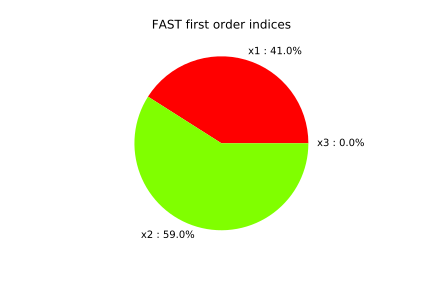

In [17]:
ot.SobolIndicesAlgorithmImplementation.DrawImportanceFactors(firstOrderIndices, distribution.getDescription(), 'FAST first order indices')

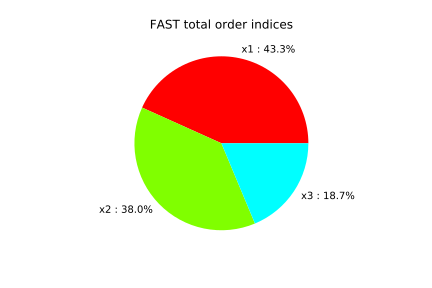

In [19]:
ot.SobolIndicesAlgorithmImplementation.DrawImportanceFactors(totalOrderIndices, distribution.getDescription(), 'FAST total order indices')